# **Assignment 1: Random Number Generation**

Random numbers are fundamental to various AI processes, from initializing weights in neural networks to providing starting points for diffusion models. They play a crucial role in ensuring variability and unpredictability in algorithms.

In this assignment, we will explore how random numbers are generated and how they can be visualized. The goals of the assignment are as follows:

- Generate random numbers by sampling from univariate and multi-variate Gaussian distribution.
- Visualize the generated numbers to understand their distribution and patterns.

**Guidelines**


1.   Try your best to avoid using ChatGPT. The assignment is simple and can be done fairly quickly with ChatGPT. Try reading and researching. The effort helps in building intuition
2.   As always, please resepct the honor code
3.   Submit your assignment in google colab file in the format `assignment-01-registration-number.ipynb`

1.   List item
2.   List item


3.   Bonus Marks: You can push your code to github and clone it here



**Helpful Material**


*   [Random Number Generator: How Do Computers Generate Random Numbers?](https://www.freecodecamp.org/news/random-number-generator/)
*   [Linear congruential generator](https://en.wikipedia.org/wiki/Linear_congruential_generator)
*   [Random number generation](https://en.wikipedia.org/wiki/Random_number_generation)
*   [Box muller transform](https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)




### 1. Generating Random Numbers

In this assignment, you will create functions to generate random numbers for 1D and 2D arrays. Develop two functions: one for 1D arrays and another for 2D arrays, each with specified mean and variance.

**Instructions:**

1. **Random Number Generation:**
   - Use numpy to generate random integers.
   - Implement a Gaussian number generator using the Box-Muller transform. The function should take mean, standard deviation, and count as inputs.
   - Implement a multivariate Gaussian generator. The function should take a mean vector, covariance matrix, and count as inputs.

2. **Implementation Details:**
   - Feel free to create additional helper functions or classes if needed.
   - Include error handling for invalid inputs, such as negative mean or variance.
   - You can use numpy and other libraries for efficient computation but not their built-in random number generators

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Linear Congruential Generator (LCG)
class LCG:
    def __init__(self, seed=42):
        self.modulus = 2**31 - 1
        self.multiplier = 48271
        self.increment = 0
        self.seed = seed

    def random(self):
        self.seed = (self.multiplier * self.seed + self.increment) % self.modulus
        return self.seed / self.modulus

In [30]:
def gaussian_pdf(x, mu, sigma):
    """ Compute the Gaussian PDF for an array of x values. """
    #plot the Gaussian
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

In [36]:
# Uni_verint  gausian samples
def Univeriant_g_s(mu, sigma, n, lcg):
    samples = []
    for _ in range(n // 2):  # Generate n/2 pairs
        U1 = lcg.random()
        U2 = lcg.random()
        #Box muller transform
        Z0 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
        Z1 = math.sqrt(-2 * math.log(U1)) * math.sin(2 * math.pi * U2)

        samples.append(mu + Z0 * sigma)
        samples.append(mu + Z1 * sigma)

    if n % 2 == 1:
        U1 = lcg.random()
        U2 = lcg.random()
        Z0 = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
        samples.append(mu + Z0 * sigma)

    return samples

In [39]:
# Multi_variate gaaussian samples
def multivariate_g_s(muh, cov, n, lcg):
    samples = []
    dim = len(muh)
    for _ in range(n):
        sample = []
        for j in range(dim):
            U1 = lcg.random()
            U2 = lcg.random()
            #Box muller transform
            Z = math.sqrt(-2 * math.log(U1)) * math.cos(2 * math.pi * U2)
            sample.append(muh[j] + Z * math.sqrt(cov[j][j]))
        samples.append(sample)
    return np.array(samples)

### 2. Generating and Visualizing Random Numbers

In this part of the assignment, you will use the functions you've created to generate random numbers and then visualize the results. This will help you understand the distribution and characteristics of the generated numbers more effectively.

**Guidelines:**

1. **Visualize the Results:**
   - Use the above functions to visualize the following
      - Uniform Distribution
      - 1d Guassian Distribution
      - 2d Gaussian Distribution

3. **Implementation Details:**
   - Use libraries such as `matplotlib` and `seaborn` for visualization. Make sure to include appropriate labels and titles to make your plots informative.

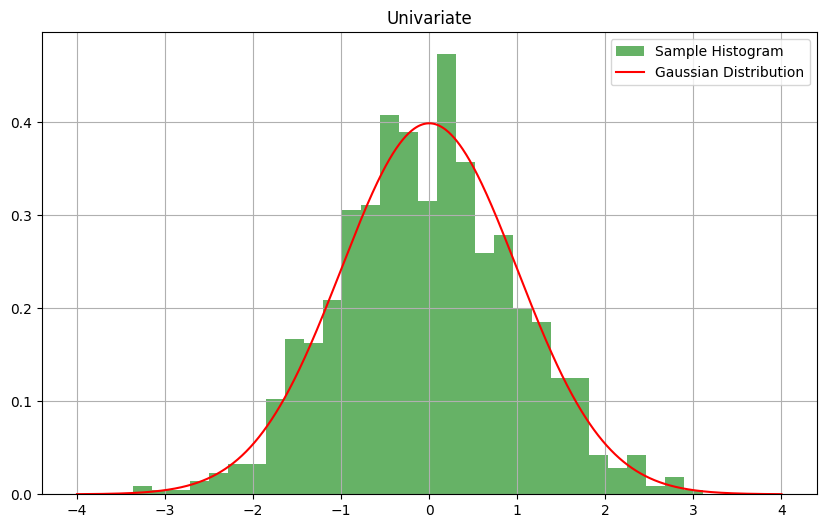

In [42]:
# Uni Verient
mu = 0    # Mean
sd = 1 # SD
samples = 1000  #samples

#Linear congruential generator
lcg = LCG(seed=42)


samples_uni = Univeriant_g_s(mu,sd, samples, lcg)


plt.figure(figsize=(10, 6))

plt.hist(samples_uni, bins=30, density=True, alpha=0.6, color='g', label='Sample Histogram')

x_uni = np.linspace(mu - 4*sd, mu + 4*sd, 1000)
y_uni = gaussian_pdf(x_uni, mu, sd)
plt.plot(x_uni, y_uni, color='red', label='Gaussian Distribution')

plt.title('Univariate')
plt.legend()
plt.grid()
plt.show()

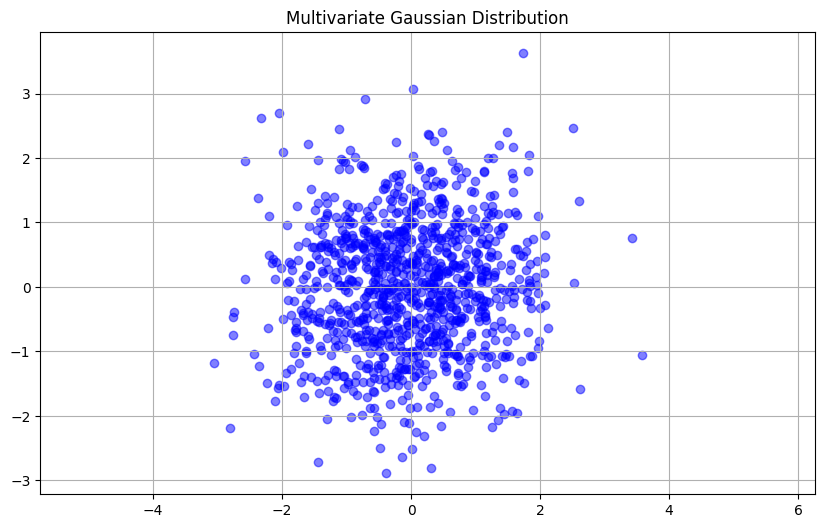

In [41]:
# Uni Verient
mu_m = [0, 0]
cov_m = [[1, 0.5], [0.5, 1]]
n_m = 1000
samples_multi = multivariate_g_s(mu_m, cov_m, n_m, lcg)
plt.figure(figsize=(10, 6))
plt.scatter(samples_multi[:, 0], samples_multi[:, 1], alpha=0.5, color='r')
plt.title('Multivariate')
plt.axis('equal')
plt.grid()
plt.show()